In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(".\cryptojacking_final_dataset.csv")
df

C:\Users\rohan\AppData\Local\Temp\ipykernel_35660\2973448065.py:1: DtypeWarning: Columns (14,19,26,27,52,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(".\cryptojacking_final_dataset.csv")


,cpu_guest,cpu_guest_nice,cpu_idle,cpu_iowait,cpu_irq,cpu_nice,cpu_softirq,cpu_steal,cpu_system,cpu_total,...,processcount_thread,processcount_total,system_hostname,system_hr_name,system_linux_distro,system_os_name,system_os_version,system_platform,timestamp,infected_state
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,100.0,...,155.0,122.0,vm1-graph-analytics,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,28-01-2020 19:24,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,100.0,...,155.0,122.0,vm1-graph-analytics,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,28-01-2020 19:24,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,100.0,...,155.0,122.0,vm1-graph-analytics,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,28-01-2020 19:24,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,100.0,...,157.0,122.0,vm1-graph-analytics,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,28-01-2020 19:24,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,100.0,...,155.0,122.0,vm1-graph-analytics,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,28-01-2020 19:24,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95307,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,100.0,...,134.0,111.0,localhost.localdomain,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.el7.x86_64,64bit,28-01-2020 15:31,True
95308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0,...,134.0,111.0,localhost.localdomain,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.el7.x86_64,64bit,28-01-2020 15:31,True
95309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0,...,132.0,109.0,localhost.localdomain,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.el7.x86_64,64bit,28-01-2020 15:31,True
95310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,...,131.0,108.0,localhost.localdomain,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.el7.x86_64,64bit,28-01-2020 15:31,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95312 entries, 0 to 95311
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cpu_guest                      95311 non-null  float64
 1   cpu_guest_nice                 95311 non-null  float64
 2   cpu_idle                       95311 non-null  float64
 3   cpu_iowait                     95310 non-null  float64
 4   cpu_irq                        95311 non-null  float64
 5   cpu_nice                       95310 non-null  float64
 6   cpu_softirq                    95310 non-null  float64
 7   cpu_steal                      95311 non-null  float64
 8   cpu_system                     95311 non-null  float64
 9   cpu_total                      95310 non-null  float64
 10  cpu_user                       95311 non-null  float64
 11  diskio_sda1_disk_name          95312 non-null  object 
 12  diskio_sda1_key                95312 non-null 

In [4]:
df.isna().sum().sum() #to check number of missing values in the dataset

30

In [5]:
#Clearing the dataset and normalising the dataset
df = df.select_dtypes(exclude=['object'])            #we are excluding those columns which are of type object because they are categorical data
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]  #checing for the nan, inf, -inf in the dataset


In [6]:
df["infected_state"] = df["infected_state"].astype(int) #taking our target feature as integer as it is bool


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95310 entries, 0 to 95311
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cpu_guest                     95310 non-null  float64
 1   cpu_guest_nice                95310 non-null  float64
 2   cpu_idle                      95310 non-null  float64
 3   cpu_iowait                    95310 non-null  float64
 4   cpu_irq                       95310 non-null  float64
 5   cpu_nice                      95310 non-null  float64
 6   cpu_softirq                   95310 non-null  float64
 7   cpu_steal                     95310 non-null  float64
 8   cpu_system                    95310 non-null  float64
 9   cpu_total                     95310 non-null  float64
 10  cpu_user                      95310 non-null  float64
 11  diskio_sda1_read_bytes        95310 non-null  float64
 12  diskio_sda1_write_bytes       95310 non-null  int64  
 13  d

In [8]:
#imputing the missing values in the dataset along columns using mean
df.fillna(df.mean().round(1),inplace=True)  
df.isna().sum().sum()

0

In [9]:
#Split the dataset into feature and target set

X = df.copy()
X.drop(list(X.filter(regex='mem_')), axis = 1, inplace = True)
X.drop(list(X.filter(regex = 'memswap')), axis = 1, inplace = True)
X.drop(list(X.filter(regex = 'fs_/_device_name')), axis = 1, inplace = True)
X.drop(list(X.filter(regex = 'system_hostname')), axis = 1, inplace = True)
X = X.iloc[:, :-1]
y = df['infected_state'].astype(int)
X


,cpu_guest,cpu_guest_nice,cpu_idle,cpu_iowait,cpu_irq,cpu_nice,cpu_softirq,cpu_steal,cpu_system,cpu_total,...,percpu_0_nice,percpu_0_softirq,percpu_0_steal,percpu_0_system,percpu_0_total,percpu_0_user,processcount_running,processcount_sleeping,processcount_thread,processcount_total
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,100.0,...,0.0,0.0,0,3.0,100.0,8.0,2.0,120.0,155.0,122.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,100.0,...,0.0,0.0,0,11.2,100.0,88.8,2.0,120.0,155.0,122.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,100.0,...,0.0,0.0,0,6.2,100.0,93.8,2.0,120.0,155.0,122.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,100.0,...,0.0,0.0,0,4.2,100.0,95.8,2.0,120.0,157.0,122.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,100.0,...,0.0,0.0,0,4.9,100.0,95.1,2.0,120.0,155.0,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95307,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,100.0,...,1.0,0.0,0,1.0,100.0,33.0,2.0,109.0,134.0,111.0
95308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0,...,0.0,0.0,0,2.0,100.0,35.0,2.0,109.0,134.0,111.0
95309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0,...,0.0,0.0,0,2.0,100.0,40.0,3.0,106.0,132.0,109.0
95310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,...,0.0,0.0,0,1.0,100.0,34.0,2.0,106.0,131.0,108.0


In [10]:
X.drop(list(X.filter(regex = 'timestamp')), axis = 1, inplace = True) #dropping the timestamp feature becasuse time constraints conflicts in building the model

In [11]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt


In [12]:
#Using Logistic Regression Classifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
lin_model = LogisticRegression() #creating the logistic regression model
lin_model.fit(X_train, y_train)
y_pred=lin_model.predict(X_test)

In [14]:
#model diagnostic
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[24164,   120],
       [ 2294,  2015]], dtype=int64)

In [15]:
#From the confusion matrix we can see that:
#True positive predictions: 24318
#True negative predictions: 2129
#False positive predictions: 2147
#False negative predictions: 0

In [16]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24284
           1       0.94      0.47      0.63      4309

    accuracy                           0.92     28593
   macro avg       0.93      0.73      0.79     28593
weighted avg       0.92      0.92      0.90     28593



In [17]:
#accuracy score, f1-score, precision, recall
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("f1-score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred)) 
print("recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9155737418249222
f1-score: 0.6253879577901924
Precision: 0.9437939110070258
recall: 0.4676258992805755


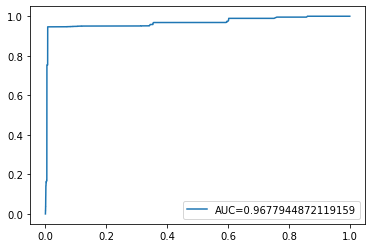

In [18]:
#plooting the confusion matrix
y_pred_proba = lin_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc)) #create ROC curve
plt.legend(loc=4)
plt.show()

In [19]:
#using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_model.score(X_test, y_test)

0.9985311090126954

In [20]:
# Making Predictions with Our Model
y_pred=dt_model.predict(X_test)

In [21]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
#print(confusion_matrix(y_test,y_pred))

[[24260    24]
 [   18  4291]]


In [22]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24284
           1       0.99      1.00      1.00      4309

    accuracy                           1.00     28593
   macro avg       1.00      1.00      1.00     28593
weighted avg       1.00      1.00      1.00     28593



In [23]:
#accuracy score, f1-score, precision, recall
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("f1-score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred)) 
print("recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9985311090126954
f1-score: 0.9951298701298701
Precision: 0.9944380069524913
recall: 0.9958226966813646


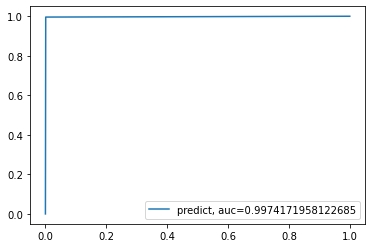

[Text(0.5, 15.0, 'predict'), Text(33.0, 0.5, 'True')]

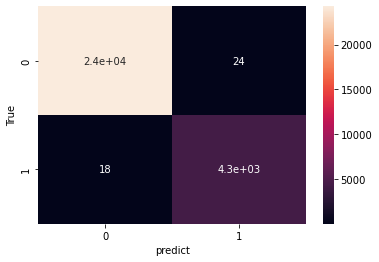

In [24]:
y_pred_proba = dt_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="predict, auc="+str(auc))
plt.legend(loc=4)
plt.show()
###############

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
s = sns.heatmap(cm, annot=True)
s.set(xlabel='predict', ylabel='True')

# plt.show()

In [25]:
#Using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
#training the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred = knn.predict(X_test)
cnf_knn = metrics.confusion_matrix(y_test, y_pred)
cnf_knn

array([[24200,    84],
       [  200,  4109]], dtype=int64)

In [28]:
cr_knn=classification_report(y_test,y_pred)

In [29]:
print(cnf_knn)
print(cr_knn)

[[24200    84]
 [  200  4109]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     24284
           1       0.98      0.95      0.97      4309

    accuracy                           0.99     28593
   macro avg       0.99      0.98      0.98     28593
weighted avg       0.99      0.99      0.99     28593



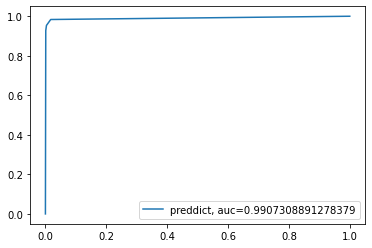

In [30]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="preddict, auc="+str(auc))
plt.legend(loc=4)
plt.show()